In [1]:
import numpy as np
import scipy.integrate as integ
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import skimage.io

In [2]:
var("t,x,y")

(t, x, y)

# Hamiltonsche Systeme mit komplizierten Phasenportraits

Wir betrachten folgende Hamiltonsche Funktion:

In [3]:
%display latex
F=8+(x+1)*(x+0)*(x-1)*(y+1)*(y+1/10)*(y-1)+y*x^2+1/10*y
F

1/10*(x + 1)*(x - 1)*x*(10*y + 1)*(y + 1)*(y - 1) + x^2*y + 1/10*y + 8

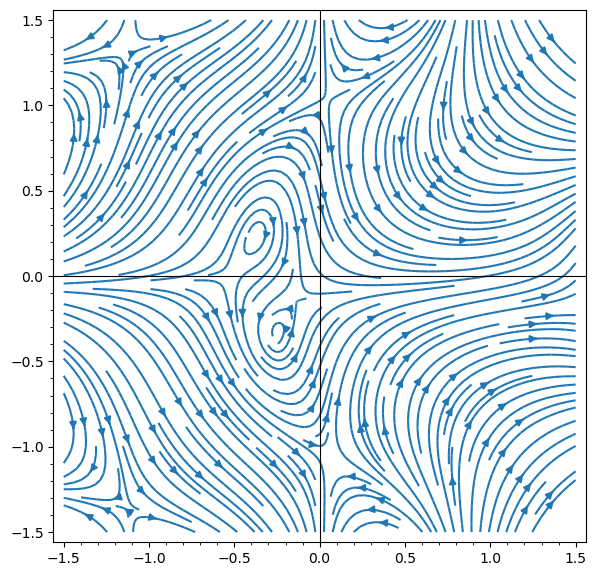

In [4]:
M = diff(F,x)
N = diff(F,y)
p=streamline_plot([N,-M],[x,-1.5,1.5],[y,-1.5,1.5],density=2)
p.set_aspect_ratio(1)
p.show(figsize=(6,6))

# Divergenz

Im folgenden Plotten wir Gradientenfeldern (die Pfeile) zusammen mit ihrer Divergenz (die Färbung des Hintergrunds)

In [12]:
F1=1/(1+x^2)*1/(1+y^2)-1/(1+(x-2)^2)*1/(1+(y-1)^2)
M1 = -diff(F1,x)
N1 = -diff(F1,y)
D1=diff(M1,x)+diff(N1,y)
F1

-1/(((x - 2)^2 + 1)*((y - 1)^2 + 1)) + 1/((x^2 + 1)*(y^2 + 1))

Als Divergenz ergibt sich hier:

In [13]:
%display text latex
D1

8*(x - 2)^2/(((x - 2)^2 + 1)^3*((y - 1)^2 + 1)) - 8*x^2/((x^2 + 1)^3*(y^2 + 1)) + 8*(y - 1)^2/(((x - 2)^2 + 1)*((y - 1)^2 + 1)^3) - 8*y^2/((x^2 + 1)*(y^2 + 1)^3) - 2/(((x - 2)^2 + 1)*((y - 1)^2 + 1)^2) - 2/(((x - 2)^2 + 1)^2*((y - 1)^2 + 1)) + 2/((x^2 + 1)*(y^2 + 1)^2) + 2/((x^2 + 1)^2*(y^2 + 1))

Hier sieht man die Bedeutung als "Quellendichte" sehr deutlich ...

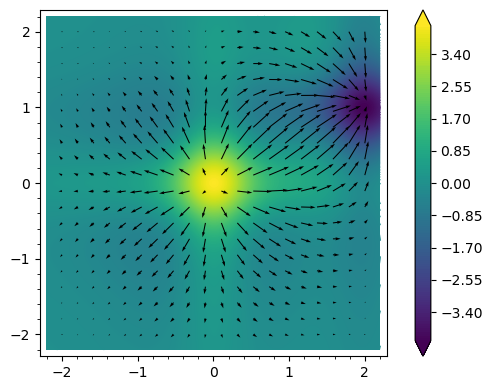

In [14]:
cmap = matplotlib.cm.get_cmap("viridis")
P = contour_plot(D1,(x,-2.2,2.2),(y,-2.2,2.2),contours=200,cmap=cmap,zorder=-100,colorbar=True)+plot_vector_field([M1,N1],(x,-2,2),(y,-2,2),zorder=10)
#P.save_image("divergenz.pdf")
P

... hier ist das ganze schon weniger offensichtlich.

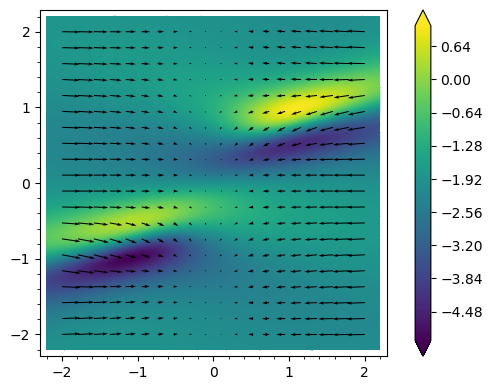

In [15]:
F2=x^2+y^3/(y^4+(x-y)^2+1)
M2 = -diff(F2,x)
N2 = -diff(F2,y)
D2=diff(M2,x)+diff(N2,y)
cmap = matplotlib.cm.get_cmap("viridis")
contour_plot(D2,(x,-2.2,2.2),(y,-2.2,2.2),contours=200,cmap=cmap,zorder=-100,colorbar=True)+plot_vector_field([M2,N2],(x,-2,2),(y,-2,2),zorder=10)

Betrachtet man hingegen das zugehörige Hamiltonsche Vektorfeld, so verschwindet die Divergenz.

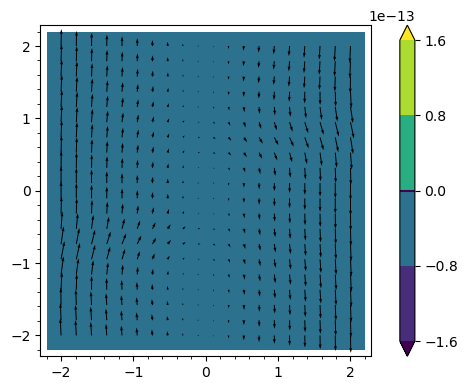

In [18]:
D3=diff(-N2,x)+diff(M2,y)
cmap = matplotlib.cm.get_cmap("viridis")
contour_plot(D3,(x,-2.2,2.2),(y,-2.2,2.2),contours=2,cmap=cmap,zorder=-100,colorbar=True)+plot_vector_field([-N2,M2],(x,-2,2),(y,-2,2),zorder=10)

# Lösungsfluss für Hamiltonsche Systeme

Betrachten wir nun, wie sich eine Menge unter dem Lösungsfluss eines Hamiltonschen Systems ändert.

Dazu starten wir mit eine Abbildung des Passauer Wolfs von https://commons.wikimedia.org/wiki/File:Wappen_Passau.svg (gemeinfrei)

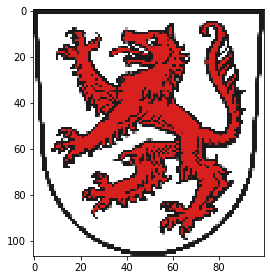

In [19]:
%display text plain
wappen = skimage.io.imread("wappen-passau.png")
wappen = skimage.img_as_float(wappen)
skimage.io.imshow(wappen)

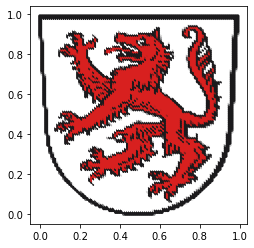

In [20]:
height, width, _ = wappen.shape
xrange = [k/float(width) for k in range(width)]
yrange = [k/float(height) for k in range(height)]
start = np.array(cartesian_product([xrange,yrange]))
coloring = np.reshape(np.flip(wappen,0),(height*width,4),order="F")
xp = [p[0] for p in start]
yp = [p[1] for p in start] 
fig, ax = plt.subplots();
ax.scatter(xp,yp,color=coloring,s=15,edgecolors="none");
ax.set_aspect("equal")

Als Hamiltonsche Funktion verwenden wir diesmal:


In [21]:
%display latex
F=(x+x^2-y)/(x^2+y^4+1)
F

(x^2 + x - y)/(y^4 + x^2 + 1)

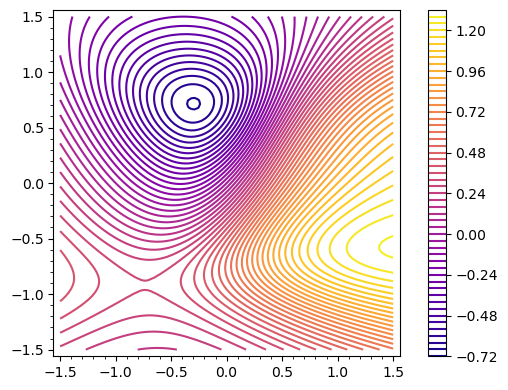

In [22]:
cmap = matplotlib.cm.get_cmap("plasma")
contour_plot(F,(x,-1.5,1.5),(y,-1.5,1.5),fill=false,contours=50,cmap=cmap,colorbar=True)

Ableiten ergibt

In [23]:
Ms = diff(F,x)
Ns = diff(F,y)
print (Ms)
print (Ns)

(2*x + 1)/(y^4 + x^2 + 1) - 2*(x^2 + x - y)*x/(y^4 + x^2 + 1)^2
-4*(x^2 + x - y)*y^3/(y^4 + x^2 + 1)^2 - 1/(y^4 + x^2 + 1)


Damit das gane hinreichend schnell wird, hier nocheinmal direkt als Pythonfunktionen:

In [24]:
def M(x,y):
    return (2*x + 1)/(y^4 + x^2 + 1) - 2*(x^2 + x - y)*x/(y^4 + x^2 + 1)^2
def N(x,y):
    return -4*(x^2 + x - y)*y^3/(y^4 + x^2 + 1)^2 - 1/(y^4 + x^2 + 1)
def f(t,p):
    return (N(*p),-M(*p))
            

Damit können wir jetzt den Fluss auf unseren Passauer Wolf anwenden. Aus Geschwindigkeitsgründen wird diesmal direkt mit Matplotlib geplottet.

## Achtung: Das dauert eine Weile!

In [25]:
def plot_transformed(t,k):
    trajectories = [integ.solve_ivp(f,[0,t],y0=pl)["y"] for pl in start]
    finalpoints = [tuple(zip(*tra))[-1] for tra in trajectories]
    xpoints = np.linspace(-1.5,1.5,300)
    ypoints = np.linspace(-1.5,1.5,300)
    xgrid, ygrid = np.meshgrid(xpoints,ypoints)
    upoints = N(xgrid,ygrid)
    vpoints = -M(xgrid,ygrid)
    fig, ax = plt.subplots()
    ax.streamplot(xgrid,ygrid,upoints,vpoints,density=2);
    ax.set_aspect("equal");
    fig.dpi=100;
    fig.set_size_inches(10,10);
    xp = [p[0] for p in finalpoints]
    yp = [p[1] for p in finalpoints]
    ax.scatter(xp,yp,c=coloring,s=30,edgecolors="none",zorder=100);
    fig.savefig(f"wappen-transformiert-fein-{k}.png")
    plt.close(fig)
    
steps = 50
#for k in range(steps):
#    plot_transformed(1.5*k/steps,k)

# Der Wolf im Fluss

Jetzt können wir endlich das Ergebnis unserer Mühe als Animation darstellen:

In [26]:
%display text plain
pictures=[open(f"wappen-transformiert-fein-{k}.png","rb").read() for k in range(steps)]
slider=ipywidgets.IntSlider(value=0,min=0,max=steps-1)
im_widget=ipywidgets.Image(
    value=pictures[0],
    format='png',
    width=600,
    height=600
)
def handle_slider_change(change):
    im_widget.value = pictures[change.new]
    
play = ipywidgets.Play(
    value=0,
    min=0,
    max=steps-1,
    step=1,
    interval=100,
    description="Press play",
    disabled=False
)
slider = ipywidgets.IntSlider(max=steps-1)
ipywidgets.jslink((play, 'value'), (slider, 'value'))
slider.observe(handle_slider_change, names='value')
combined = ipywidgets.HBox([play, slider])
ipywidgets.VBox([combined,im_widget])

# Überprüfen der Invarianz des Volumens

Wir überprüfen grob, ob das Volumen erhalten wird. Dazu plotten wir einfach unsere Abbildungen mit eine roten Rechteck statt dem Passauer Wolf. Dann zählen wir im Plot die roten Pixel.

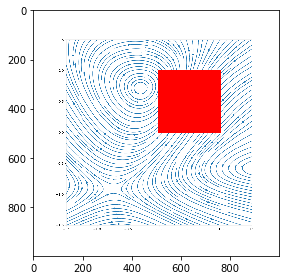

In [27]:
%display text plain
orig = skimage.io.imread("original.png")
skimage.io.imshow(orig);

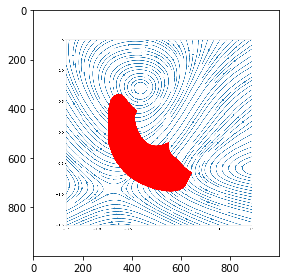

In [28]:
%display text plain
trans = skimage.io.imread("transformed.png")
skimage.io.imshow(trans);

In [ ]:
totaltrans = 0
totalorig = 0
redtrans = 0
redorig = 0
for i in orig.reshape(-1,4):
    if list(i)==[255,0,0,255]:
        redorig+=1
    totalorig+=1
for i in trans.reshape(-1,4):
    if list(i)==[255,0,0,255]:
        redtrans+=1
    totaltrans+=1
float(redtrans/totaltrans)
float(redorig/totalorig)